In [ ]:
import json

# Load and inspect the first few lines of the JSONL file
file_path = "AWS EARTHQUAKE DATASET/date=2019-06-22time=22-31-38/002/30.jsonl"

# Read the file and parse a few lines to check its structure
with open(file_path, "r") as file:
    lines = [json.loads(next(file)) for _ in range(5)]  # Read first 5 lines

# Display the structure of the first few records
lines


In [ ]:
import matplotlib.pyplot as plt

# Initialize lists for x, y, and z data
x_data, y_data, z_data = [], [], []

# Read the entire file and extract x, y, z values
with open(file_path, "r") as file:
    for line in file:
        record = json.loads(line)
        x_data.extend(record["x"])
        y_data.extend(record["y"])
        z_data.extend(record["z"])

# Create three subplots for x, y, and z axes
fig, axes = plt.subplots(3, 1, figsize=(6,6), sharex=True)

# Plot X-axis data
axes[0].plot(x_data, color='orange', label="X-axis")
axes[0].set_ylabel("Acceleration (X)")
axes[0].legend()

# Plot Y-axis data
axes[1].plot(y_data, color='m', label="Y-axis")
axes[1].set_ylabel("Acceleration (Y)")
axes[1].legend()

# Plot Z-axis data
axes[2].plot(z_data, color='green', label="Z-axis")
axes[2].set_ylabel("Acceleration (Z)")
axes[2].set_xlabel("Time")
axes[2].legend()

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists for x, y, z data and timestamps
x_data, y_data, z_data, time_data = [], [], [], []
file_path = "AWS EARTHQUAKE DATASET/date=2019-06-22time=22-31-38/002/30.jsonl"
# Read the entire file and extract x, y, z values along with timestamps
with open(file_path, "r") as file:
    for line in file:
        record = json.loads(line)
        device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT
        sr = record["sr"]  # Sampling rate

        # Generate time values for each sample in the batch
        duration = len(record["x"]) / sr
        time_values = [(device_time - timedelta(seconds=(duration - i / sr))).strftime('%Y-%m-%d %H:%M:%S.%f')[:-3] 
                       for i in range(len(record["x"]))]

        x_data.extend(record["x"])
        y_data.extend(record["y"])
        z_data.extend(record["z"])
        time_data.extend(time_values)

# Convert time_data to numpy array for better handling
time_data = np.array(time_data)

# Create three subplots for x, y, and z axes
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot X-axis data
axes[0].plot(time_data, x_data, color='orange', label="X-axis")
axes[0].set_ylabel("Acceleration (X)")
axes[0].legend()

# Plot Y-axis data
axes[1].plot(time_data, y_data, color='g', label="Y-axis")
axes[1].set_ylabel("Acceleration (Y)")
axes[1].legend()

# Plot Z-axis data
axes[2].plot(time_data, z_data, color='b', label="Z-axis")
axes[2].set_ylabel("Acceleration (Z)")
axes[2].set_xlabel("Time (GMT)")
axes[2].legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_13204\1436280049.py:16: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT


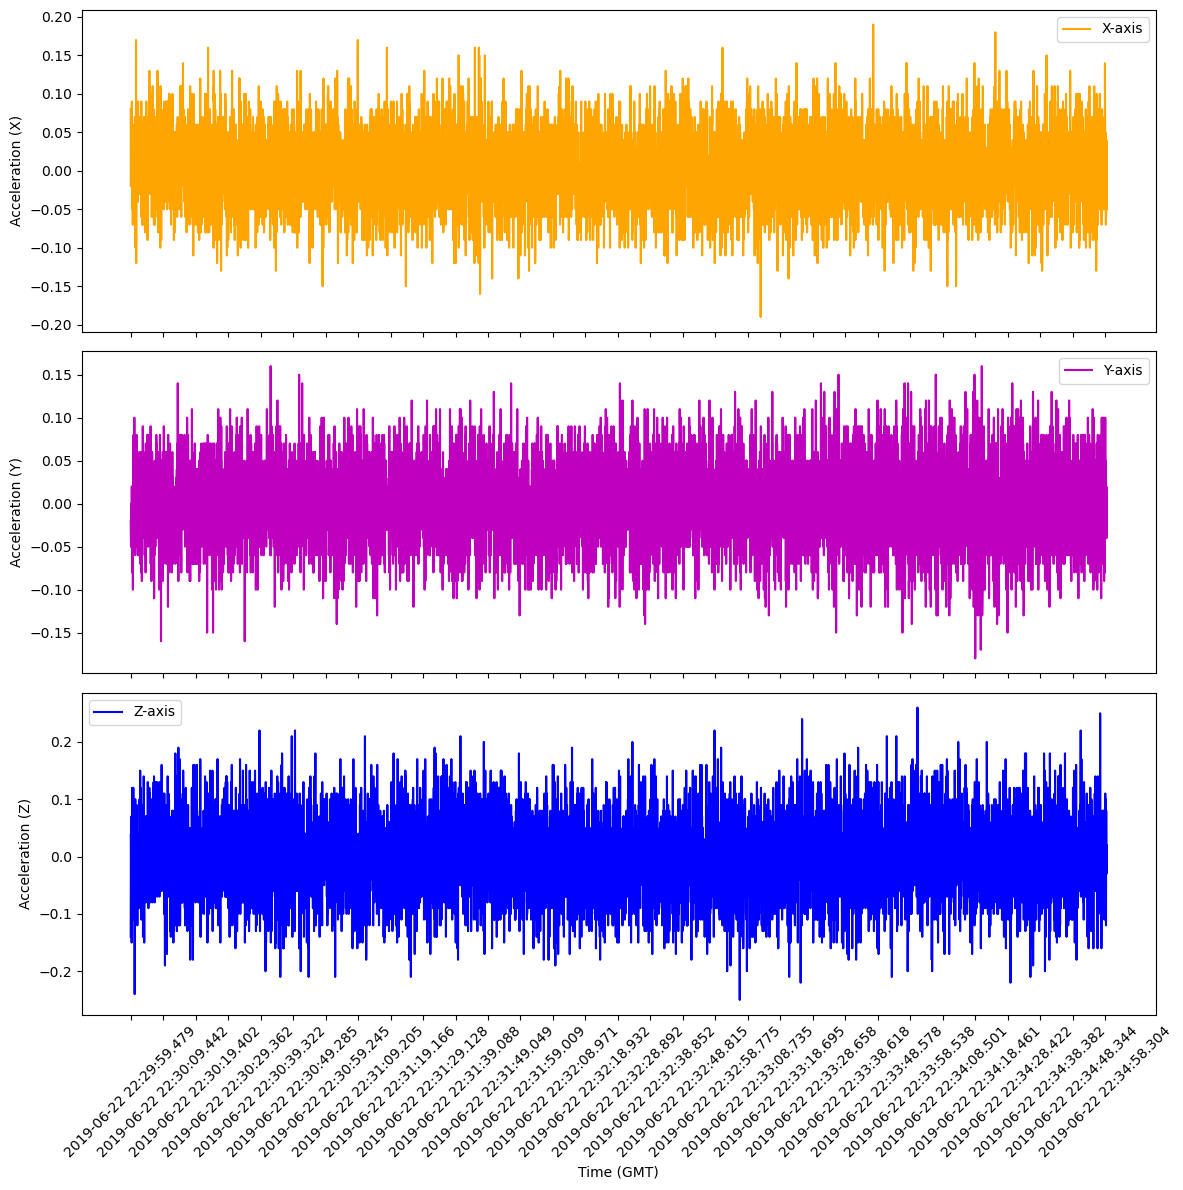

In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# File path (update this with your actual file path)
file_path = "AWS EARTHQUAKE DATASET/date=2019-06-22time=22-31-38/002/30.jsonl"

# Initialize lists for x, y, z data and timestamps
x_data, y_data, z_data, time_data = [], [], [], []

# Read the entire file and extract x, y, z values along with timestamps
with open(file_path, "r") as file:
    for line in file:
        record = json.loads(line)
        device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT
        sr = record["sr"]  # Sampling rate

        # Generate time values for each sample in the batch
        duration = len(record["x"]) / sr
        time_values = [(device_time - timedelta(seconds=(duration - i / sr))).strftime('%Y-%m-%d %H:%M:%S.%f')[:-3] 
                       for i in range(len(record["x"]))]

        x_data.extend(record["x"])
        y_data.extend(record["y"])
        z_data.extend(record["z"])
        time_data.extend(time_values)

# Convert time_data to numpy array for better handling
time_data = np.array(time_data)

# Reduce the number of x-axis labels for better spacing
step = int(sr*10)  # Show label every 10 second
time_labels = time_data[::step]  # Downsample time labels
indices = np.arange(len(time_data))[::step]  # Indices for labels

# Create three subplots for x, y, and z axes
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot X-axis data
axes[0].plot(time_data, x_data, color='orange', label="X-axis")
axes[0].set_ylabel("Acceleration (X)")
axes[0].legend()

# Plot Y-axis data
axes[1].plot(time_data, y_data, color='m', label="Y-axis")
axes[1].set_ylabel("Acceleration (Y)")
axes[1].legend()

# Plot Z-axis data
axes[2].plot(time_data, z_data, color='b', label="Z-axis")
axes[2].set_ylabel("Acceleration (Z)")
axes[2].set_xlabel("Time (GMT)")
axes[2].legend()

# Set custom x-axis labels
plt.xticks(indices, time_labels, rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [20]:
output_dir = "output_plots_srcdist"
os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist


<function matplotlib.pyplot.savefig(*args, **kwargs) -> 'None'>

C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_13316\1401676176.py:19: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT


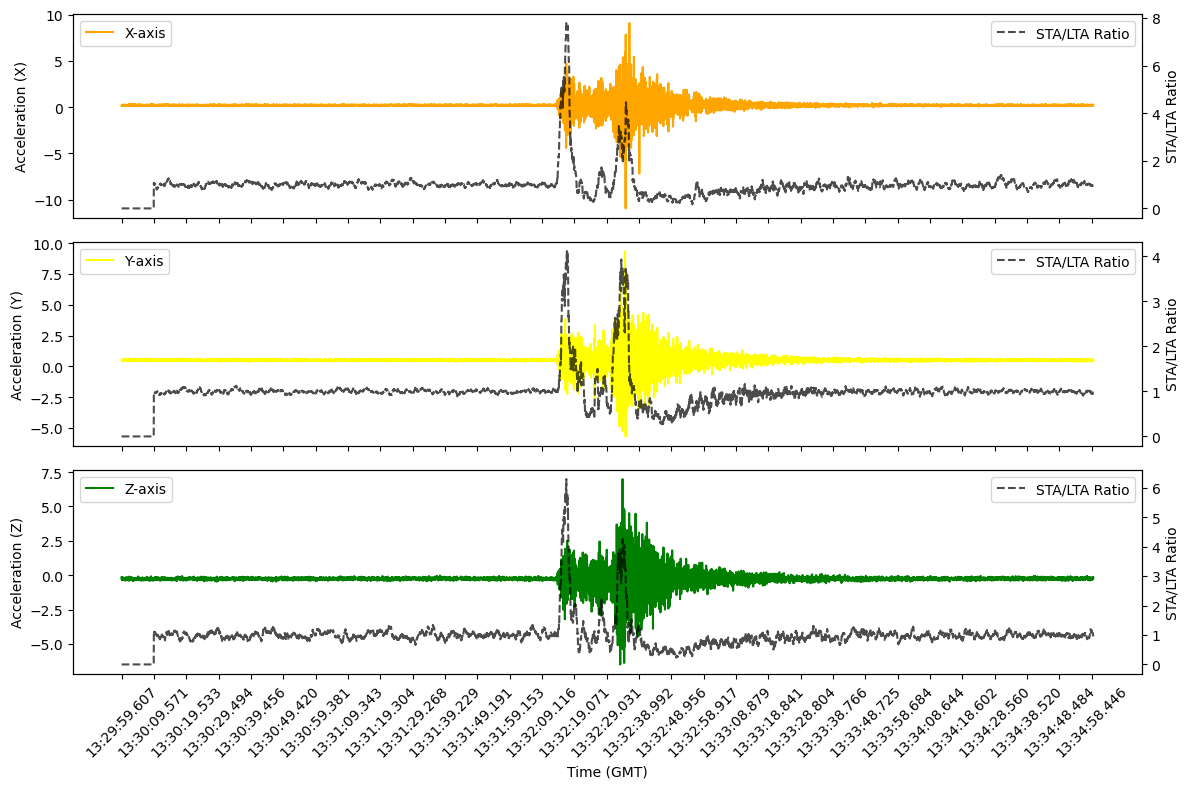

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from obspy.signal.trigger import classic_sta_lta

# File path (update if needed)
# file_path = "AWS EARTHQUAKE DATASET/date=2018-02-17time= 21-30-43/000/25.jsonl"
file_path="AWS EARTHQUAKE DATASET/date=2018-07-19time=13-31-55/006/30.jsonl"
# file_path = "AWS EARTHQUAKE DATASET/date=2019-06-22time=22-31-38/002/30.jsonl"

# Initialize lists for x, y, z data and timestamps
x_data, y_data, z_data, time_data = [], [], [], []

# Read the entire file and extract data
with open(file_path, "r") as file:
    for line in file:
        record = json.loads(line)
        device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT
        sr = record["sr"]  # Sampling rate

        # Generate time values for each sample
        duration = len(record["x"]) / sr
        time_values = [(device_time - timedelta(seconds=(duration - i / sr))).strftime('%H:%M:%S.%f')[:-3]  
                       for i in range(len(record["x"]))]

        x_data.extend(record["x"])
        y_data.extend(record["y"])
        z_data.extend(record["z"])
        time_data.extend(time_values)

# Convert to numpy arrays
x_data = np.array(x_data)
y_data = np.array(y_data)
z_data = np.array(z_data)
time_data = np.array(time_data)

# Compute STA/LTA ratios
sta_window = int(1 * sr)  # Short-term window 
lta_window = int(10* sr)    # Long-term window 

sta_lta_x = classic_sta_lta(x_data, sta_window, lta_window)
sta_lta_y = classic_sta_lta(y_data, sta_window, lta_window)
sta_lta_z = classic_sta_lta(z_data, sta_window, lta_window)

# Normalize STA/LTA for overlay visualization
# sta_lta_x /= np.max(sta_lta_x)
# sta_lta_y /= np.max(sta_lta_y)
# sta_lta_z /= np.max(sta_lta_z)

# Reduce the number of x-axis labels to prevent clutter
step = int(sr * 10)  # Show a label every 2 seconds
time_labels = time_data[::step]
indices = np.arange(len(time_data))[::step]  # Indices for labels

# Create three subplots for x, y, and z axes
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Function to plot acceleration and overlay STA/LTA ratio
def plot_accel_with_sta_lta(ax, data, sta_lta, color, label):
    ax.plot(time_data, data, color=color, label=f"{label}-axis")
    ax.set_ylabel(f"Acceleration ({label})")
    ax.legend(loc="upper left")

    # Overlay STA/LTA on secondary y-axis
    ax2 = ax.twinx()
    ax2.plot(time_data, sta_lta, color='black', alpha=0.7, linestyle="--", label="STA/LTA Ratio")
    ax2.set_ylabel("STA/LTA Ratio")
    ax2.legend(loc="upper right")

# Plot X-axis data
plot_accel_with_sta_lta(axes[0], x_data, sta_lta_x, 'orange', "X")

# Plot Y-axis data
plot_accel_with_sta_lta(axes[1], y_data, sta_lta_y, 'yellow', "Y")

# Plot Z-axis data
plot_accel_with_sta_lta(axes[2], z_data, sta_lta_z, 'green', "Z")
axes[2].set_xlabel("Time (GMT)")

# Set custom x-axis labels with spacing
axes[2].set_xticks(indices)  # Use only selected indices
axes[2].set_xticklabels(time_labels, rotation=45)  # Rotate for better visibility

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
